<center><h1 style='color:red'>COVID-19

A novel strain of coronavirus — SARS-CoV-2 — was first detected in December 2019 in Wuhan, a city in China’s Hubei province with a population of 11 million, after an outbreak of pneumonia without an obvious cause. The virus has now spread to over 200 countries and territories across the globe, and was characterised as a pandemic by the World Health Organization (WHO)

**Let's Hope for the best and make sure to Take care of yourself, your familiy members and your loved ones!**

**Disclaimer**

> Data is from scrapped from JHU github repository. Any variation in the data there will also reflect in this notebook

### **Real time Analysis** 
- Results and plots gets updated every time dataset get's updated!

# Libraries

In [1]:
# to load json files
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen

# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns
#color patch
import matplotlib.patches as mpatches

# hide warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

# Dataset

In [2]:
# Full data
# =========

full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')
print(full_table.shape)
full_table.head()

(45675, 10)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
# Grouped by day, country
# =======================

full_grouped = pd.read_csv('../input/corona-virus-report/full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
# Day wise
# ========

day_wise = pd.read_csv('../input/corona-virus-report/day_wise.csv')
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [5]:
# Country wise
# ============

country_wise = pd.read_csv('../input/corona-virus-report/country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,34740,1048,21454,12238,285,36,200,3.02,61.76,4.88,33384,1356,4.06,Eastern Mediterranean
1,Albania,3667,97,2062,1508,96,2,48,2.65,56.23,4.70,3038,629,20.70,Europe
2,Algeria,20216,1028,14295,4893,527,10,276,5.09,70.71,7.19,16879,3337,19.77,Africa
3,Andorra,861,52,803,6,3,0,0,6.04,93.26,6.48,855,6,0.70,Europe
4,Angola,541,26,118,397,16,0,0,4.81,21.81,22.03,386,155,40.16,Africa


In [6]:
# Worldometer data
# ================

worldometer_data = pd.read_csv('../input/corona-virus-report/worldometer_data.csv')
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)
print(worldometer_data.shape)
worldometer_data.head()

(209, 16)


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.310764e+08,3545077,0.0,139143.0,0.0,1600195.0,0.0,1805739.0,16337.0,10708.0,420.0,44030877.0,132993.0,Americas
1,Brazil,South America,2.126159e+08,1931204,0.0,74262.0,0.0,1213512.0,0.0,643430.0,8318.0,9083.0,349.0,4572796.0,21507.0,Americas
2,India,Asia,1.380493e+09,937844,357.0,24327.0,12.0,593178.0,98.0,320339.0,8944.0,679.0,18.0,12412664.0,8991.0,South-EastAsia
3,Russia,Europe,1.459370e+08,739947,0.0,11614.0,0.0,512825.0,0.0,215508.0,2300.0,5070.0,80.0,23495752.0,160999.0,Europe
4,Peru,South America,3.298745e+07,333867,0.0,12229.0,0.0,223261.0,0.0,98377.0,1325.0,10121.0,371.0,1963921.0,59535.0,Americas


# Latest Score Board

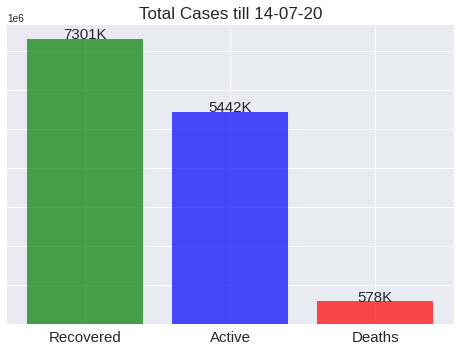

In [7]:
#get values from dataframe
temp = day_wise[['Date','Deaths', 'Recovered', 'Active']].tail(1)
dt = temp.Date.dt.strftime("%d-%m-%y").values
temp = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
temp.sort_values(by='value', inplace=True, ascending=False)

#fig = plt.treemap(temp, path=["variable"], values="value", height=225)
#fig.data[0].textinfo = 'label+text+value'
#fig.show()
bars = plt.bar(temp.variable, temp.value, color=['green', 'blue', 'red'], alpha=0.7)

#remove ytick labels
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-5, str(int(bar.get_height()/1000)) + 'K', 
                 ha='center', fontsize=15)
    
plt.xticks(temp.variable.values,fontsize=15)
plt.title('Total Cases till {}'.format(dt[0]), fontsize=17);

# Cases over the time

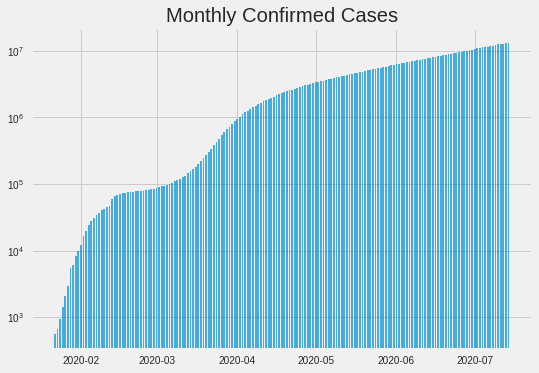

In [8]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
plt.bar(day_wise.Date,day_wise.Confirmed,width=0.7,alpha=0.7)

ax.set_yscale("log")
plt.title('Monthly Confirmed Cases');

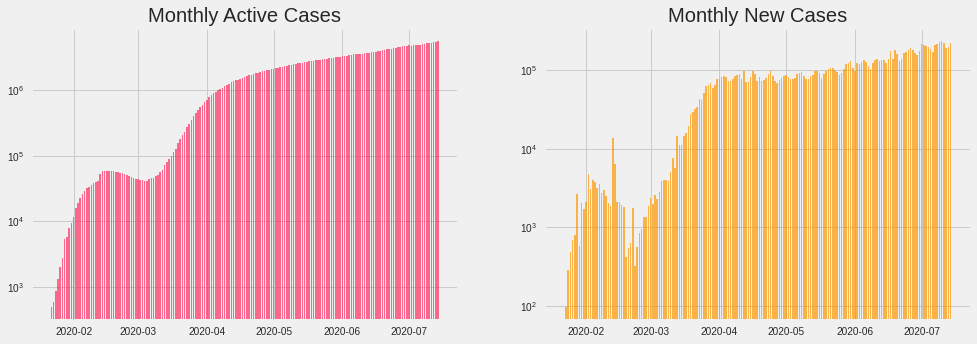

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.bar(day_wise.Date,day_wise.Active,color='#ff2e63', width=0.7,alpha=0.7)
ax1.set_yscale("log")
ax1.set_title('Monthly Active Cases');

ax2.bar(day_wise.Date,day_wise['New cases'],color='#fe9801', width=0.7,alpha=0.7)
ax2.set_yscale("log")
ax2.set_title('Monthly New Cases');

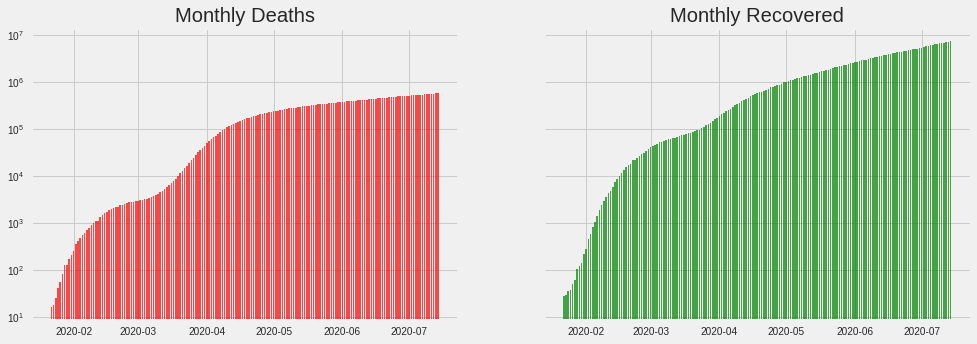

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)

ax1.bar(day_wise.Date,day_wise.Deaths,color='red', width=0.7,alpha=0.7)
ax1.set_yscale("log")
ax1.set_title('Monthly Deaths');

ax2.bar(day_wise.Date,day_wise.Recovered,color='green', width=0.7,alpha=0.7)
ax2.set_yscale("log")
ax2.set_title('Monthly Recovered');

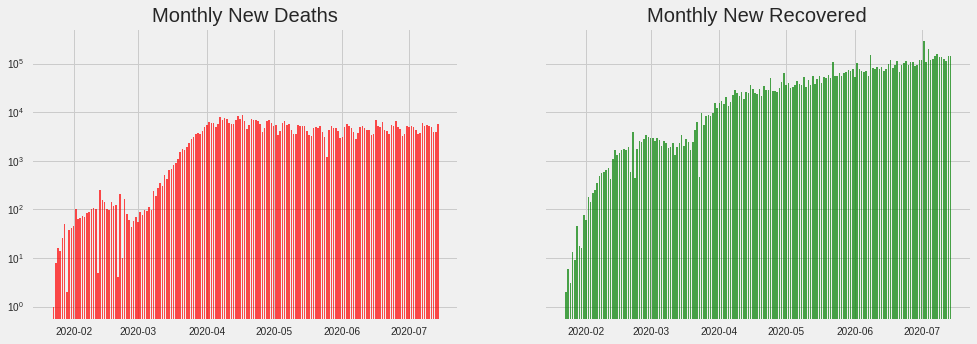

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)

ax1.bar(day_wise.Date,day_wise['New deaths'],color='red', width=0.7,alpha=0.7)
ax1.set_yscale("log")
ax1.set_title('Monthly New Deaths');

ax2.bar(day_wise.Date,day_wise['New recovered'],color='green', width=0.7,alpha=0.7)
ax2.set_yscale("log")
ax2.set_title('Monthly New Recovered');

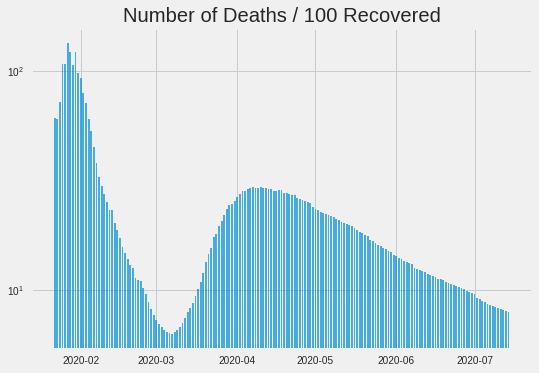

In [12]:
fig, ax = plt.subplots()
plt.bar(day_wise.Date,day_wise['Deaths / 100 Recovered'],width=0.7,alpha=0.7)

ax.set_yscale("log")
plt.title('Number of Deaths / 100 Recovered');

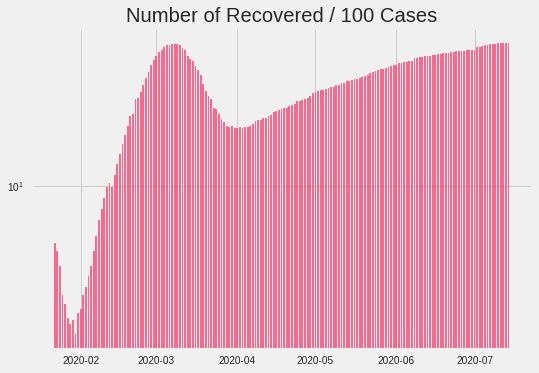

In [13]:
fig, ax = plt.subplots()
plt.bar(day_wise.Date,day_wise['Recovered / 100 Cases'],width=0.7,alpha=0.7, color='#ff2e63')

ax.set_yscale("log")
plt.title('Number of Recovered / 100 Cases');

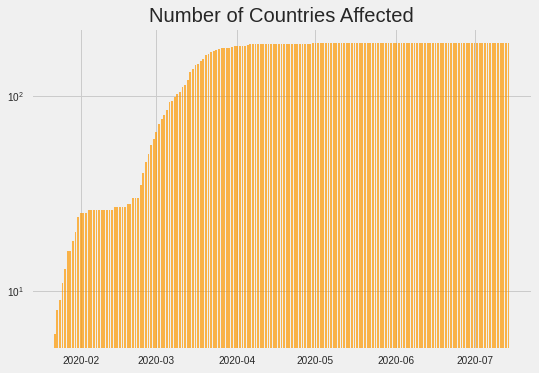

In [14]:
fig, ax = plt.subplots()
plt.bar(day_wise.Date,day_wise['No. of countries'],width=0.7,alpha=0.7, color='#fe9801')

ax.set_yscale("log")
plt.title('Number of Countries Affected');

# Top 15 Countries

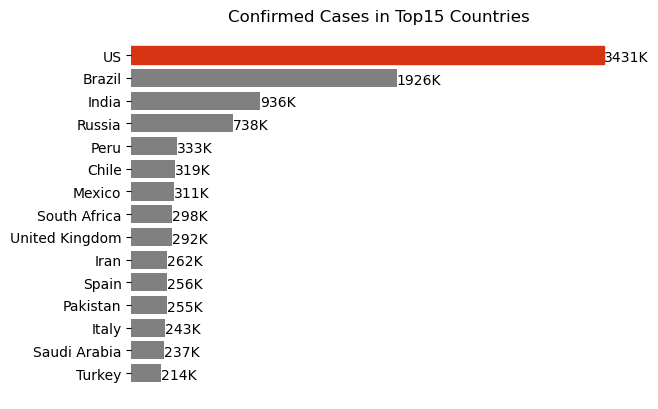

In [15]:
plt.style.use('default')

temp = country_wise[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False)[0:15]
temp.sort_values(by='Confirmed', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Confirmed'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Confirmed Cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Confirmed']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

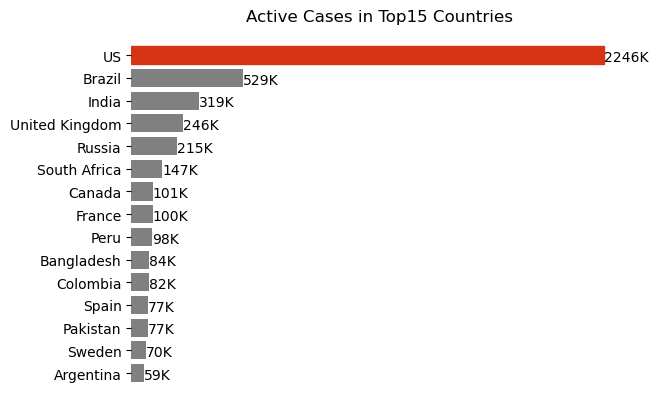

In [16]:
temp = country_wise[['Country/Region', 'Active']].sort_values(by='Active', ascending=False)[0:15]
temp.sort_values(by='Active', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Active'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Active Cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Active']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

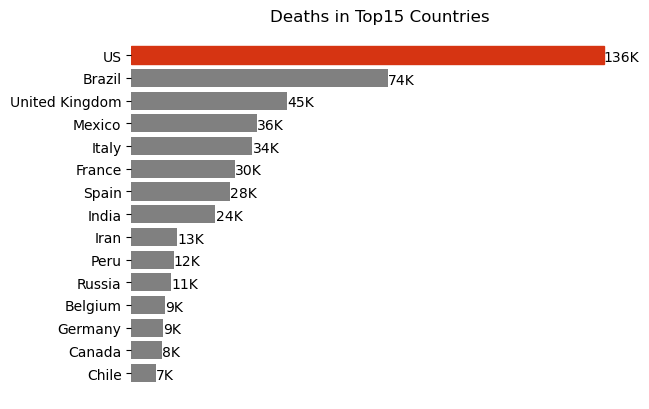

In [17]:
temp = country_wise[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False)[0:15]
temp.sort_values(by='Deaths', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Deaths'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Deaths in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Deaths']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

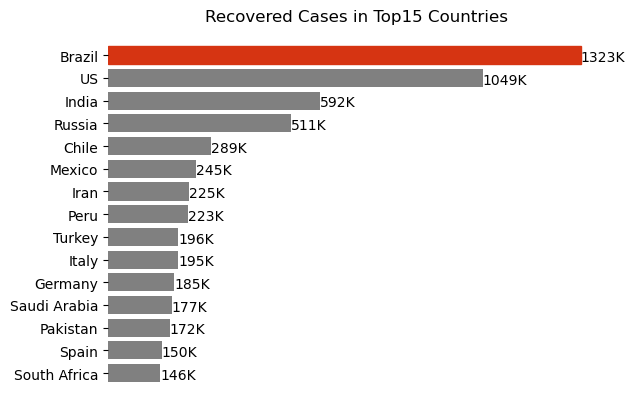

In [18]:
temp = country_wise[['Country/Region', 'Recovered']].sort_values(by='Recovered', ascending=False)[0:15]
temp.sort_values(by='Recovered', inplace=True)

bars = plt.barh(temp['Country/Region'], temp['Recovered'],color=['gray'])
bars[-1].set_color('#D63412')
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('Recovered Cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for i, v in enumerate(temp['Recovered']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)

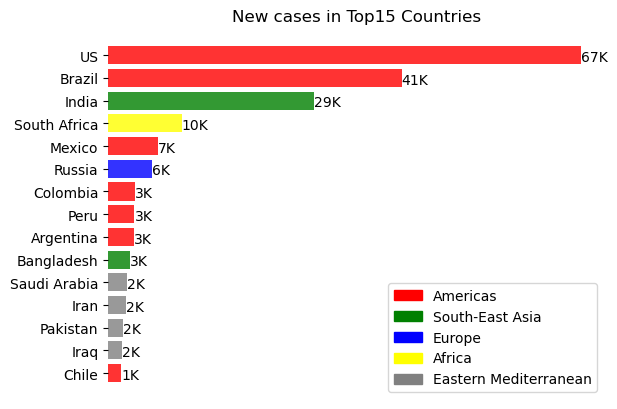

In [19]:
dic = {'Americas':'red','South-East Asia':'green','Europe':'blue','Africa':'yellow','Eastern Mediterranean':'gray'}
temp = country_wise[['Country/Region', 'New cases', 'WHO Region']].sort_values(by='New cases', ascending=False)[0:15]
temp.sort_values(by='New cases', inplace=True)
temp['WHO Region']=temp['WHO Region'].map(dic)
temp['WHO Region'].dropna(inplace=True)


bars = plt.barh(temp['Country/Region'], temp['New cases'], color=temp['WHO Region'], alpha=0.8)
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('New cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')
plt.legend()

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for i, v in enumerate(temp['New cases']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)
    
#Add Legend
patchList = []
for key in dic:
        data_key = mpatches.Patch(color=dic[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList, loc='best');

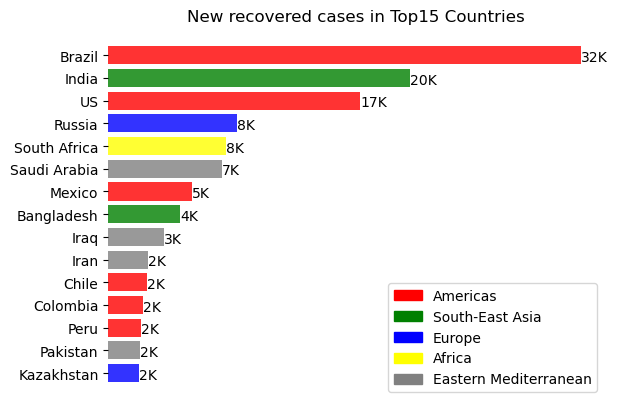

In [20]:
temp = country_wise[['Country/Region', 'New recovered', 'WHO Region']].sort_values(by='New recovered', ascending=False)[0:15]
temp.sort_values(by='New recovered', inplace=True)
temp['WHO Region']=temp['WHO Region'].map(dic)
temp['WHO Region'].dropna(inplace=True)

bars = plt.barh(temp['Country/Region'], temp['New recovered'], color=temp['WHO Region'], alpha=0.8)
plt.tick_params(labelbottom=False, bottom=False, top=False)
plt.title('New recovered cases in Top15 Countries')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')
plt.legend()

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for i, v in enumerate(temp['New recovered']):
    plt.gca().text(v + 3, i - .25, str(int(v/1000))+'K', color='black', fontsize=10)
    
#Add Legend
patchList = []
for key in dic:
        data_key = mpatches.Patch(color=dic[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList, loc='best');

# Let's start with Interactive Visualization with the help of plotly

In [21]:
import plotly.express as px

### Iteractive Maps

In [22]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale="Reds")
    fig.show()

In [23]:
plot_map(country_wise, 'Confirmed')

In [24]:
plot_map(country_wise, 'Deaths')

**Let's see how cases increases over the time!**

In [25]:
#the plot i will be using is same choropleth plot as used in above plots the 
#differnece is i will be updating the plot with colors according to the animation frame!

fig = px.choropleth(full_grouped, locations="Country/Region", 
                    color=np.log(full_grouped["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.Reds)
fig.update(layout_coloraxis_showscale=False)
fig.show()

### Interactive plot

We have already plotted number of cases using matplotlib so now i will be plotting same thing but this time by using plotly

In [26]:
def plot_daywise(col, hue):
    fig = px.bar(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [27]:
plot_daywise('New cases', '#333333')

**We have plotted cases accroding to month, try on your own to plot deaths and active cases interactively by using plotly** 

In [28]:
plot_daywise('New deaths', '#D63412')

We can also plot line graph instead of bar graph

In [29]:
def plot_daywise_line(col, hue):
    fig = px.line(day_wise, x="Date", y=col, width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [30]:
plot_daywise_line('New deaths', '#D63412')

vow!, this looks nice!

**Let's compare number of deaths vs confimed cases using scatter plot in plotly**

In [31]:
fig = px.scatter(country_wise.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', size='Confirmed', 
                 height=700, text='Country/Region', log_x=True, log_y=True, 
                 title='Deaths vs Confirmed (Scale is in log10)')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

### Top 10 countries case-report

In [32]:
temp = country_wise.iloc[:,0:5].sort_values(ascending=False, by='Confirmed').set_index('Country/Region')[:10]
temp.style.background_gradient(cmap='Greens')

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
US,3431574,136466,1049098,2246010
Brazil,1926824,74133,1323425,529266
India,936181,24309,592032,319840
Russia,738787,11597,511958,215232
Peru,333867,12229,223261,98377
Chile,319493,7069,289220,23204
Mexico,311486,36327,245830,29329
South Africa,298292,4346,146279,147667
United Kingdom,292931,45053,1385,246493


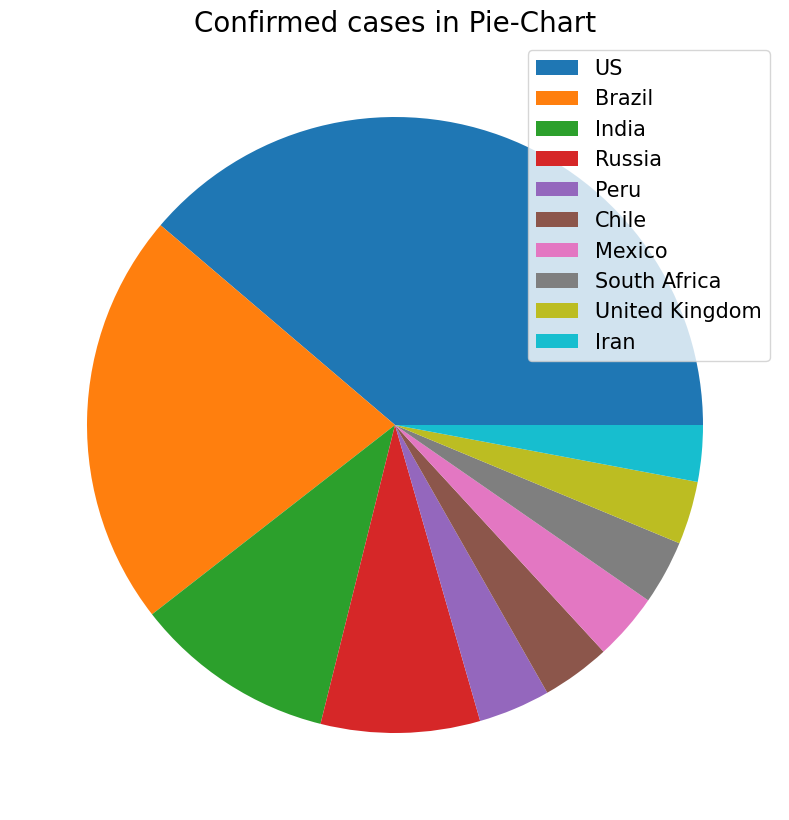

In [33]:
plt.figure(figsize=(15,10))
plt.title('Confirmed cases in Pie-Chart', size=20)
plt.pie(temp.Confirmed)
plt.legend(temp.index, loc='best', fontsize=15)
plt.show()

#### Region wise dataset

In [34]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-13-2020.csv')
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-14 04:34:46,34.223334,-82.461707,157,1,0,156.0,"Abbeville, South Carolina, US",640.110898,0.636943
1,22001.0,Acadia,Louisiana,US,2020-07-14 04:34:46,30.295065,-92.414197,1383,45,0,1338.0,"Acadia, Louisiana, US",2229.027319,3.253796
2,51001.0,Accomack,Virginia,US,2020-07-14 04:34:46,37.767072,-75.632346,1041,14,0,1027.0,"Accomack, Virginia, US",3221.314519,1.344861
3,16001.0,Ada,Idaho,US,2020-07-14 04:34:46,43.452658,-116.241552,4448,25,0,4423.0,"Ada, Idaho, US",923.612971,0.562050
4,19001.0,Adair,Iowa,US,2020-07-14 04:34:46,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


### Top20 Region Wise report

In [35]:
latest_data.sort_values(by='Confirmed', ascending=False)\
            .loc[:10,['Country_Region','Province_State','Confirmed','Deaths','Recovered','Active']]\
            .reset_index(drop=True)[:20]\
            .style.background_gradient(cmap='Greens')

,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active
0,Brazil,Sao Paulo,374607,17907,230680,126020.000000
1,South Africa,nan,287796,4172,138241,145383.000000
2,India,Maharashtra,260924,10482,144507,105935.000000
3,Iran,nan,259652,13032,222539,24081.000000
4,United Kingdom,England,250007,40245,0,209762.000000
5,Chile,Metropolitana,239791,5858,221418,12515.000000
6,Saudi Arabia,nan,235111,2243,169842,63026.000000
7,Russia,Moscow,230029,4168,164954,60907.000000
8,US,New York,219301,23323,0,195978.000000
9,Turkey,nan,214001,5382,195671,12948.000000


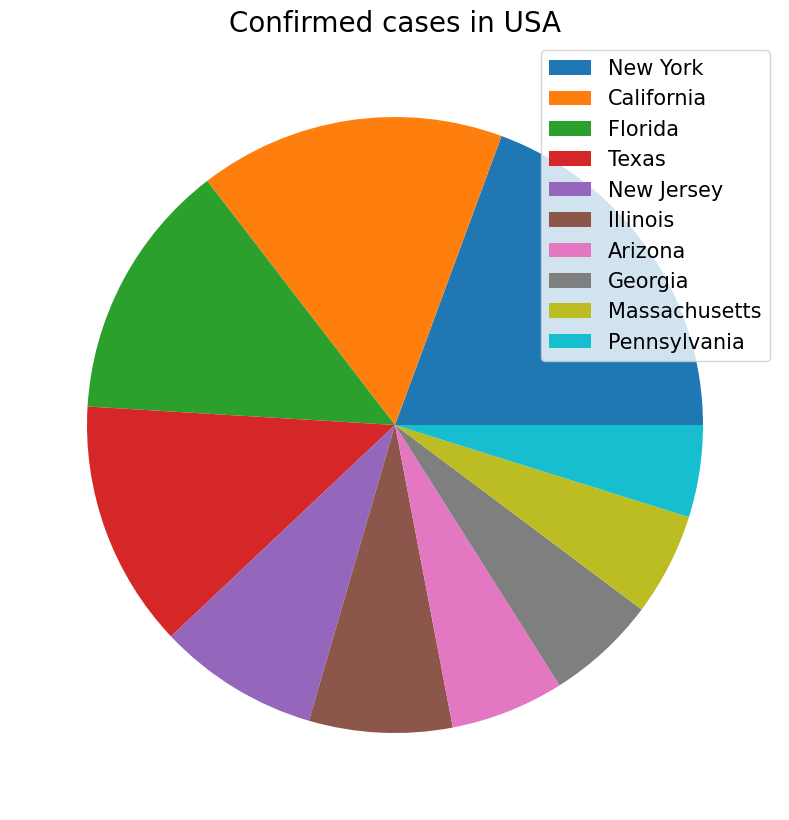

In [36]:
temp = latest_data[latest_data.Country_Region == 'US']\
            .loc[:,['Province_State','Confirmed']]\
            .groupby(['Province_State']).sum()\
            .sort_values(by='Confirmed',ascending=False)\
            .iloc[:10]

plt.figure(figsize=(15,10))
plt.title('Confirmed cases in USA', size=20)
plt.pie(temp.Confirmed)
plt.legend(temp.index, loc='best', fontsize=15)
plt.show()

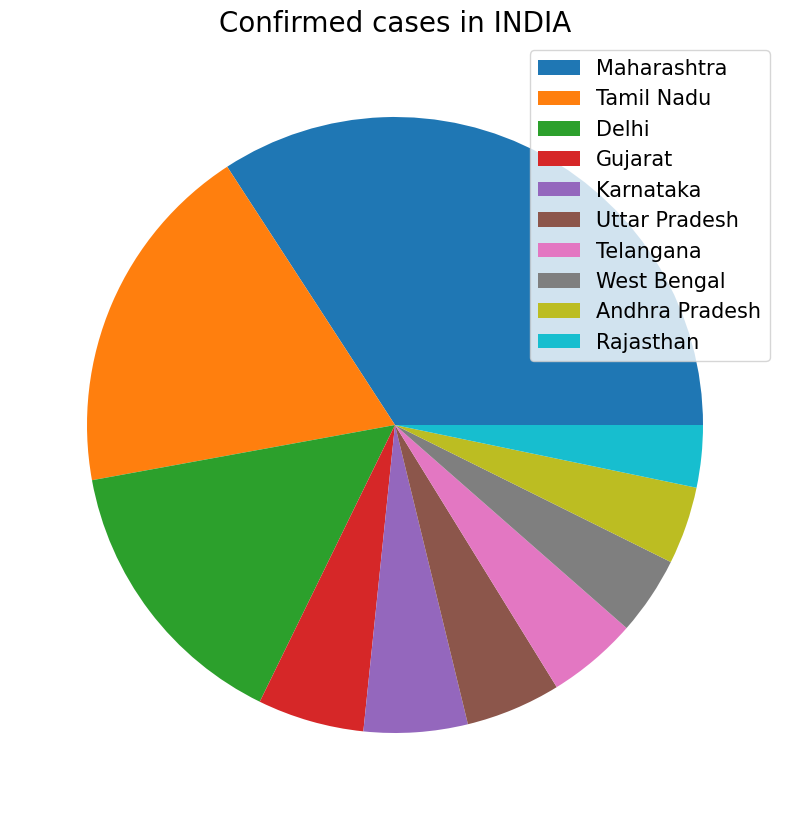

In [37]:
temp = latest_data[latest_data.Country_Region == 'India']\
            .loc[:,['Province_State','Confirmed']]\
            .groupby(['Province_State']).sum()\
            .sort_values(by='Confirmed',ascending=False)\
            .iloc[:10]

plt.figure(figsize=(15,10))
plt.title('Confirmed cases in INDIA', size=20)
plt.pie(temp.Confirmed)
plt.legend(temp.index, loc='best', fontsize=15)
plt.show()

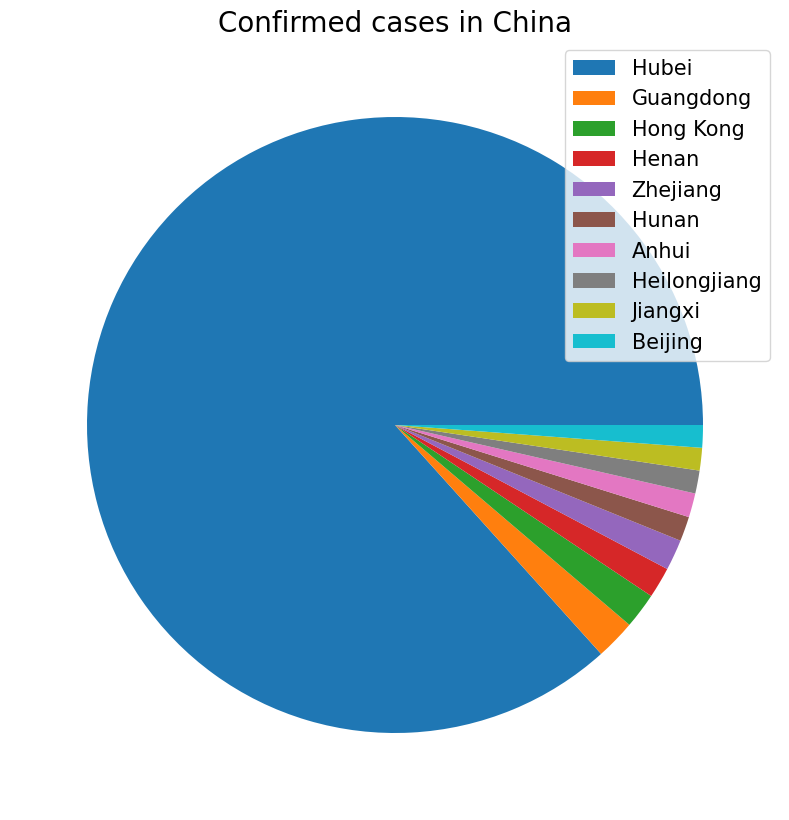

In [38]:
temp = latest_data[latest_data.Country_Region == 'China']\
            .loc[:,['Province_State','Confirmed']]\
            .groupby(['Province_State']).sum()\
            .sort_values(by='Confirmed',ascending=False)\
            .iloc[:10]

plt.figure(figsize=(15,10))
plt.title('Confirmed cases in China', size=20)
plt.pie(temp.Confirmed)
plt.legend(temp.index, loc='best', fontsize=15)
plt.show()

# Upcomming notebook version(Releasing Soon):

- More analysis on cases(More plots and statistical results)
- More interactive plots
- Analysis on CORONA VIRUS

<center><h1 style='color:green'>Dn't forget to Upvote, Thanks and Be Safe!